In [1]:
import numpy as np
import pandas as pd
from FinancialInstrument import FinancialInstrument
from ETF import ETF
from Future import Future
from Portfolio import Portfolio
from datetime import date
from DateRanges import electionPeriodBoolsDF, e_year_ranges

Total Time Period
Max sharpe ratio: 0.5437868145426494
Max sharpe ratio portfolio annualized log return: 0.12530497447171837
Max sharpe ratio portfolio annualized volatility of log returns: 0.15106969022099676
Max sharpe ratio portfolio weights: [ 0.5        -0.01931063  0.5         0.486153    0.03315764 -0.5       ]


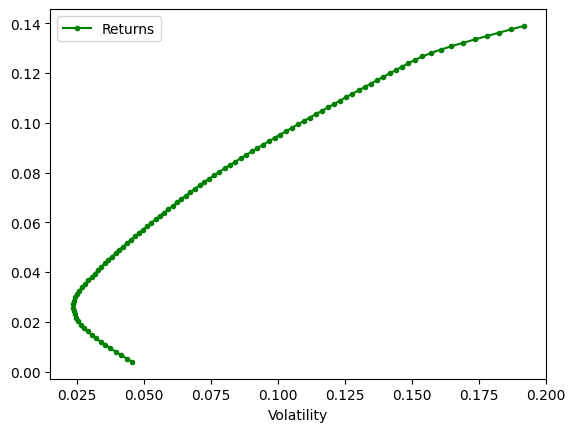

In [6]:
etfXLK = ETF("XLK")
etfXLU = ETF("XLU")
etfBND = ETF("BND")
etfGLD = ETF("GLD")
etfVTI = ETF("VTI")
futureFF1 = Future("FF1")
futureCL1 = Future("CL1")
portfolio1 = Portfolio([etfXLK, etfXLU, etfBND, etfGLD, etfVTI, futureFF1])
print("Total Time Period")
portfolio1.plot_ef(n_points=100)
max_sharpe_ratio, ret, vol, weights = portfolio1.max_sharpe_portfolio(n_points=100)
print("Max sharpe ratio: " + str(max_sharpe_ratio))
print("Max sharpe ratio portfolio annualized log return: " + str(ret))
print("Max sharpe ratio portfolio annualized volatility of log returns: " + str(vol))
print("Max sharpe ratio portfolio weights: " + str(weights))